[Annotated notes](https://pwskills.notion.site/Annotated-Notes-6-f56dbae4606f432497665e3fceca5aa7)\
[Notes with code](https://pwskills.notion.site/Class-Notes-6-da74d181e91c4d169685501784e44b5d)

# 2D Arrays (Continued)

**Question:** Given an `m × n` integer matrix, if an element is `0`, set its entire row and column to `0`'s. You must do it in-place.

**Example:**
$$\begin{bmatrix}
1 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1
\end{bmatrix} \rightarrow
\begin{bmatrix}
1 & 0 & 1 \\
0 & 0 & 0 \\
1 & 0 & 1
\end{bmatrix}
$$
Input: `matrix = [[1, 1, 1], [1, 0, 1], [1, 1, 1]]`.

Output: `[[1, 0, 1], [0, 0, 0], [1, 0, 1]]`.

In [1]:
# My solution

def rows_cols_to_zeros(matrix: list):
    n_rows = len(matrix)
    n_cols = len(matrix[0])
    
    zero_indices = []
    for r in range(n_rows):
        for c in range(n_cols):
            if matrix[r][c] == 0:
                zero_indices.append([r, c])
    
    for indices in zero_indices:
        matrix[indices[0]] = [0] * n_cols
        for r in range(n_rows):
            matrix[r][indices[1]] = 0
    
    return matrix

In [2]:
matrix = [
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
]

rows_cols_to_zeros(matrix)

[[1, 0, 1], [0, 0, 0], [1, 0, 1]]

In [3]:
matrix = [
    [1, 0, 1],
    [1, 0, 0],
    [0, 1, 1]
]

rows_cols_to_zeros(matrix)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [4]:
matrix = [
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
]

rows_cols_to_zeros(matrix)

[[0, 0, 0], [0, 0, 0], [0, 0, 1]]

**Solution:**

As a first approach, we will iterate over all the elements, and whenever we come accross a zero, we will put its row in a hashset, and its column in another hashset. At the end, we will get all the rows and all the columns that we need to make as zeros. The algorithm for this is the following:
1. We make a pass through the matrix and look for zero elements.
2. If element at `i, j` is zero, then record `i` in a row hashset, and `j` in a column hashset.
3. Iterate over the matrix again and make all the elements `matrix[r][c] = 0` if `r` is in the row hashset, and `c` is in the column hashset.

The time complexity is $\mathcal{O}\left( mn \right)$, and the space complexity as $\mathcal{O}\left( m+n \right)$.

Now, is there an approach where we do not take the extra space? We will use the first element of every row and column as a flag. Consider the example of the following matrix.
$$\begin{bmatrix}
1 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1
\end{bmatrix}$$
Iterating over all the elements:
1. If there is an element `0`, we will change the first element of its corresponding row and column to `0`, giving us $$\begin{bmatrix}
1 & 0 & 1 \\
0 & 0 & 1 \\
1 & 1 & 1
\end{bmatrix}$$
2. We again iterate over all the elements.
    - For the element at `00`, the first element of its corresponding row is `1` and its corresponding column is `1`. So, we leave this element as `1`.
    - The element at `01` is `0`, hence, we will leave it as it is.
    - For the element at `02`, the first element of its corresponding tow is `1` and its corresponding column is `1`. So, we leave it as `1`.
    - The element at `10` is `0`, hence we leave it as it is.
    - The element at `11` is `0`, hence we leave it as it is.
    - For the element at `12`, the first element of its corresponding row is `0`, and its corresponding column is `1`. So, we change this element to `0`, giving us $$\begin{bmatrix}
1 & 0 & 1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}$$
    - For the element at `20`, the first element of its corresponding row is `1`, and its corresponding column is `1`, hence we leave it as it is.
    - For the element at `21`, the first element of its corresponding row is `1`, however it is `0` for its corresponding column. Hence, we change this element to `0`, giving us $$\begin{bmatrix}
1 & 0 & 1 \\
0 & 0 & 0 \\
1 & 0 & 1
\end{bmatrix}$$
    - For the element at `22`, the first element of its corresponding row is `1` and its corresponding column is `1`. So, we leave it as it is. Finally, we get the matrix $$\begin{bmatrix}
1 & 0 & 1 \\
0 & 0 & 0 \\
1 & 0 & 1
\end{bmatrix}$$
which is the answer.

However, there is a catch. If we consider the element at `00`, when can we change it to `0`? We can change it to `0` if either the first element of its corresponding row is `0` or the first element of its corresponding column is `0`. But, it itself is the first element in its row and column (WASN'T CLEAR, WATCH THE LECTURE AGAIN).

The algorithm for this approach is the following:

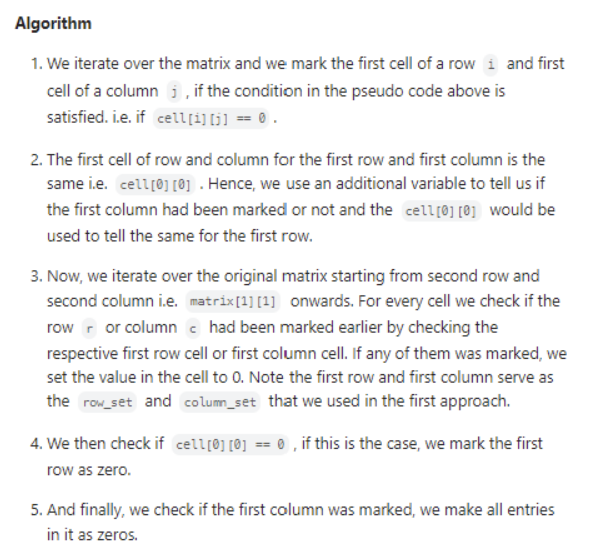

In [5]:
# Ma'am's solution
def setZeroes(matrix):
    isCol = False
    R = len(matrix)
    C = len(matrix[0])

    for i in range(R):
        if matrix[i][0] == 0:
            isCol = True

        for j in range(1, C):
            if matrix[i][j] == 0:
                matrix[0][j] = 0
                matrix[i][0] = 0

    for i in range(1, R):
        for j in range(1, C):
            if matrix[i][0] == 0 or matrix[0][j] == 0:
                matrix[i][j] = 0

    if matrix[0][0] == 0:
        for j in range(C):
            matrix[0][j] = 0

    if isCol:
        for i in range(R):
            matrix[i][0] = 0
    
    return matrix

In [6]:
matrix = [
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
]

setZeroes(matrix)

[[1, 0, 1], [0, 0, 0], [1, 0, 1]]

In [7]:
matrix = [
    [1, 0, 1],
    [1, 0, 0],
    [0, 1, 1]
]

setZeroes(matrix)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [8]:
matrix = [
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
]

setZeroes(matrix)

[[0, 0, 0], [0, 0, 0], [0, 0, 1]]

**Question:** In MATLAB, there is a handy function called reshape which can reshape an `m × n` matrix into a new one with a different size `r × c` keeping its original data. You are given an `m × n` matrix `mat` and two integers `r` and `c` representing the number of rows and the number of columns of the wanted reshaped matrix. The reshaped matrix should be filled with all the elements of the original matrix in the same row-traversing order as they were. If the reshape operation with given parameters is possible and legal, output the new reshaped matrix; Otherwise, output the original matrix.

**Example:**

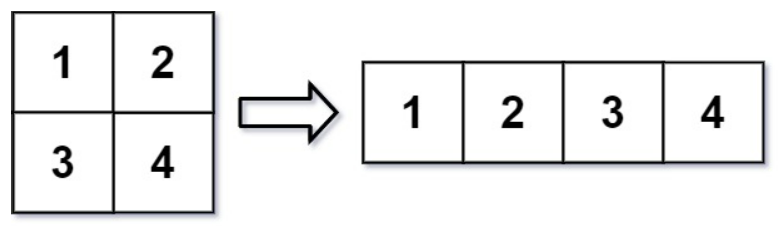

Input: `mat = [[1, 2], [3, 4]]`, `r = 1`, `c = 4`.

Output: `[[1, 2, 3, 4]]`.

In [9]:
# My solution

def reshape(mat: list, r: int, c: int):
    n_rows_mat = len(mat)
    n_cols_mat = len(mat[0])
    
    if r * c != n_rows_mat * n_cols_mat:
        return mat
    else:
        reshaped_mat = []

        for i in range(r):
            reshaped_mat.append([0] * c)

        elements_of_mat = []

        for i in range(n_rows_mat):
            for j in range(n_cols_mat):
                elements_of_mat.append(mat[i][j])

        i = 0
        j = c
        r = 0
        for row in reshaped_mat:
            row = elements_of_mat[i:j]
            reshaped_mat[r] = row
            r += 1
            i += c
            j += c
        
        return reshaped_mat

In [10]:
mat = [
    [1, 2],
    [3, 4],
    [5, 6],
]
r = 2
c = 3

reshape(mat, r, c)

[[1, 2, 3], [4, 5, 6]]

In [11]:
mat = [
    [1, 2],
    [3, 4]
]
r = 1
c = 4

reshape(mat, r, c)

[[1, 2, 3, 4]]

In [12]:
mat = [
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
]
r = 2
c = 5

reshape(mat, r, c)

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

In [13]:
mat = [
    [1, 2, 3, 4]
]
r = 2
c = 2

reshape(mat, r, c)

[[1, 2], [3, 4]]

In [14]:
mat = [
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
]
r = 2
c = 2

reshape(mat, r, c)

[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]

**Solution:**

First of all, this operation will be possible only if the number of elements in the original matrix and the reshaped matrix is the same, i.e., `m × n == r × c`.

As a first approach, we can use queue. We will push in the elements from the original matrix into this queue, create another matrix of order `r × c`, and push elements from the queue into this matrix. The time complexity for this is $\mathcal{O}\left( mn \right)$, and the space complexity is $\mathcal{O}\left( mn \right)$.

Can there be an approach where we do not use any extra space that we used for a queue? We do not really need a queue. For example, if we have a matrix $$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}$$and we are asked to reshape it into a matrix of order $3\times 2$. We will first create a matrix of zeros of order $3\times 2$. Next, we will start with iterating over each element of the original matrix, and start with the zeroth row of the matrix and start filling the elements. We will fill the elements until we fill the last column, i.e., the second column in this case, and then we go to the next row. The time complexity will be $\mathcal{O}\left( mn \right)$, and space complexity will be $\mathcal{O}\left( 1 \right)$.

In [15]:
# Ma'am's solution
from collections import deque

def matrixReshape(nums, r, c):
    res = [[0] * c for _ in range(r)]
    if len(nums) == 0 or r * c != len(nums) * len(nums[0]):
        return nums
    queue = deque()
    for i in range(len(nums)):
        for j in range(len(nums[0])):
            queue.append(nums[i][j])
    for i in range(r):
        for j in range(c):
            res[i][j] = queue.popleft()
    return res

In [16]:
mat = [
    [1, 2],
    [3, 4]
]
r = 1
c = 4

matrixReshape(mat, r, c)

[[1, 2, 3, 4]]

Another approach is the following. Consider the matrix with the `ij` pairs $$\begin{bmatrix}
00 & 01 & 02 & 03\\
10 & 11 & 12 & 13\\
20 & 21 & 22 & 23
\end{bmatrix}$$
Say, `c` is the total number of columns. We know the count of the elements start from `0`. We can see that the count of a particular element divided (integer division) `c` gives us the corresponding row. Also, the count of the element `% c` gives us corresponding column. As an example, we have `c = 4`. Have a look at the `6`-th element, i.e., element at `12`, i.e., `i = 1` and `j = 2`. We can see that `6 // 4 = 1 = i` and `6 % 4 = 2 = j`. This is true for all elements.

In [17]:
def matrix_reshape(nums: list, r: int, c: int):
    
    if len(nums) == 0 or r * c != len(nums) * len(nums[0]):
        return nums
    else:
        res = []

        for i in range(r):
            res.append([0] * c)
        
        count = 0
        
        for i in range(len(nums)):
            for j in range(len(nums[0])):
                res[count // c][count % c] = nums[i][j]
                count += 1
        
        return res

In [18]:
mat = [
    [1, 2],
    [3, 4]
]
r = 1
c = 4

matrix_reshape(mat, r, c)

[[1, 2, 3, 4]]

**Question:** Given an `n × n` binary matrix image, flip the `image` horizontally, then invert it, and return the resulting image.

To flip an image horizontally means that each row of the image is reversed.
* For example, flipping `[1, 1, 0]` horizontally results in `[0, 1, 1]`.

To invert an image means that each `0` is replaced by `1`, and each `1` is replaced by `0`.
* For example, inverting `[0, 1, 1]` results in `[1, 0, 0]`.

**Example:**

Input: `image = [[1, 1, 0], [1, 0, 1], [0, 0, 0]]`.

Output: `[[1, 0, 0], [0, 1, 0], [1, 1, 1]]`.

Explanation: First reverse each row: `[[0, 1, 1], [1, 0, 1], [0, 0, 0]]`. Then, invert the image: `[[1, 0, 0], [0, 1, 0], [1, 1, 1]]`.

In [19]:
# My solution

def flip(arr: list):
    left = 0
    right = len(arr) - 1
    
    while left < right:
        temp = arr[left]
        arr[left] = arr[right]
        arr[right] = temp
        left += 1
        right -= 1
    
    return arr

def flip_invert(image: list):
    n = len(image)
    for r in range(n):
        image[r] = flip(image[r])
    for r in range(n):
        for c in range(n):
            if image[r][c] == 1:
                image[r][c] = 0
            elif image[r][c] == 0:
                image[r][c] = 1
                
    return image

In [20]:
image = [
    [1, 1, 0],
    [1, 0, 1],
    [0, 0, 0]
]

flip_invert(image)

[[1, 0, 0], [0, 1, 0], [1, 1, 1]]

**Solution:**

We can get a good solution by observing the following.
$$\begin{bmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 0 & 0
\end{bmatrix} (\text{Flip})\rightarrow \begin{bmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
0 & 0 & 0
\end{bmatrix} (\text{Invert})\rightarrow \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 1 & 1
\end{bmatrix}$$

So, in the end, we have
$$\begin{bmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 0 & 0
\end{bmatrix} \rightarrow \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 1 & 1
\end{bmatrix}$$
We can observe that if the `i`-th number of a row is equal to the `n - i - 1`-th number, then the number remains the same. However, if the `i`-th number is not equal to the `n - i - 1`-th number, then it changes.

The time complexity is $\mathcal{O}\left( mn \right)$, and the space complexity is $\mathcal{O}\left( 1 \right)$.

In [21]:
def flipAndInvertImage(image: list):
    C = len(image[0])
    for row in image:
        for i in range((C + 1) // 2):
            tmp = row[i] ^ 1
            row[i] = row[C - 1 - i] ^ 1
            row[C - 1 - i] = tmp
    return image

In [22]:
image = [
    [1, 1, 0],
    [1, 0, 1],
    [0, 0, 0]
]

flipAndInvertImage(image)

[[1, 0, 0], [0, 1, 0], [1, 1, 1]]